In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import pynance as pn   # ← PyNance



In [2]:
# Load your stock data (YOU MUST PLACE YOUR FILE IN THE SAME FOLDER)
df = pd.read_csv("..\src\META.csv")

# Standardize column names (important)
df.columns = df.columns.str.title()

# Make sure required columns exist
required_cols = ["Open", "High", "Low", "Close", "Volume"]
print("Found columns:", df.columns.tolist())

missing = [col for col in required_cols if col not in df.columns]
if missing:
    print("❌ Missing columns:", missing)
else:
    print("✅ All required columns found.")

# Convert Date column
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")
else:
    print("⚠️ No Date column found.")


<>:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\hp\AppData\Local\Temp\ipykernel_21332\2792669153.py:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df = pd.read_csv("..\src\META.csv")


Found columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
✅ All required columns found.


In [3]:
# Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)

# RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(
    df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2
)

# Stochastic Oscillator
df['slowk'], df['slowd'] = talib.STOCH(
    df['High'], df['Low'], df['Close'],
    fastk_period=14,
    slowk_period=3,
    slowd_period=3
)

print("✅ Technical indicators calculated!")
df.head()


✅ Technical indicators calculated!


,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,upper_band,middle_band,lower_band,slowk,slowd
0,2012-05-18,37.995762,44.724282,37.767172,41.792356,573576400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-05-21,33.821495,36.435382,32.797807,36.306177,168192700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-05-22,30.810066,33.384198,30.750434,32.410203,101786600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-05-23,31.803938,32.300874,31.167860,31.177799,73600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-05-24,32.827625,33.006523,31.575347,32.748117,50237200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Daily returns
# FIXED: Using the standard pandas method .pct_change()
df["Returns"] = df["Close"].pct_change()

# Rolling volatility (20-day)
df["Volatility_20"] = df["Returns"].rolling(20).std()

# Sharpe Ratio (simplified)
# Note: This is an unannualized, simplified 20-day Sharpe Ratio
df["Sharpe"] = df["Returns"].rolling(20).mean() / df["Returns"].rolling(20).std()

# Cumulative returns
df["Cumulative_Returns"] = (1 + df["Returns"]).cumprod()

print("✅ Financial metrics added using pandas!")
print(df.tail())

✅ Financial metrics added using pandas!
           Date       Close        High         Low        Open    Volume  \
2918 2023-12-22  351.224823  355.011477  349.068105  353.401377  11772800   
2919 2023-12-26  352.655975  354.792827  351.284456  352.814999   9898600   
2920 2023-12-27  355.637543  356.800387  353.132994  353.888347  13207900   
2921 2023-12-28  356.124634  359.682686  355.617749  357.496184  11798800   
2922 2023-12-29  351.791290  357.794292  349.664418  356.790470  14987100   

          SMA_20      SMA_50      EMA_20     RSI_14  ...  MACD_hist  \
2918  332.302945  323.317843  335.581703  67.333885  ...   2.215461   
2919  333.303278  324.115724  337.207824  68.187000  ...   2.165514   
2920  334.239505  324.844828  338.963036  69.947874  ...   2.162908   
2921  335.537503  325.527023  340.597473  70.237702  ...   2.025990   
2922  336.869788  326.262290  341.663551  64.296803  ...   1.499818   

      upper_band  middle_band  lower_band      slowk      slowd   Retu

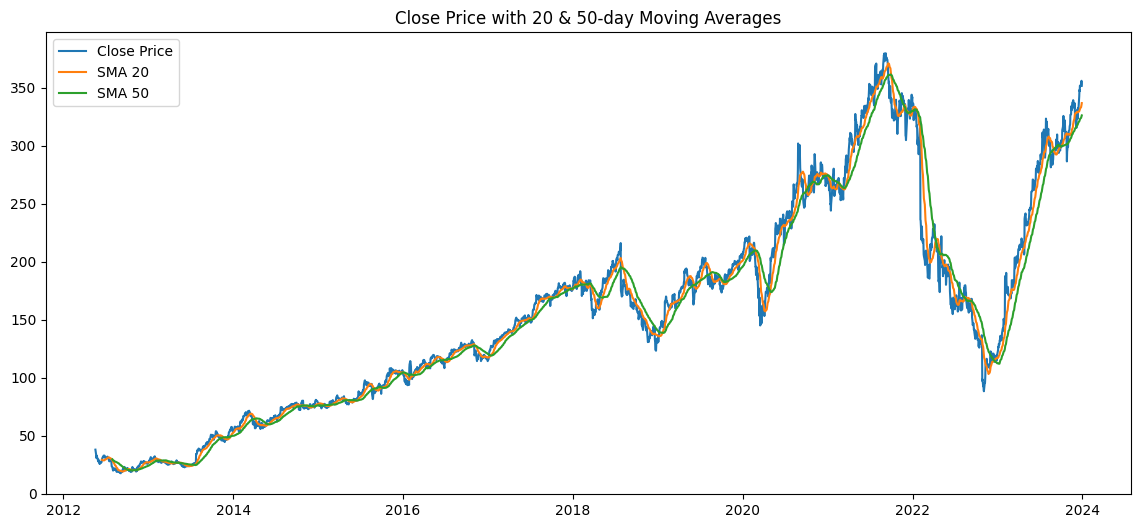

In [5]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["SMA_20"], label="SMA 20")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50")
plt.title("Close Price with 20 & 50-day Moving Averages")
plt.legend()
plt.show()


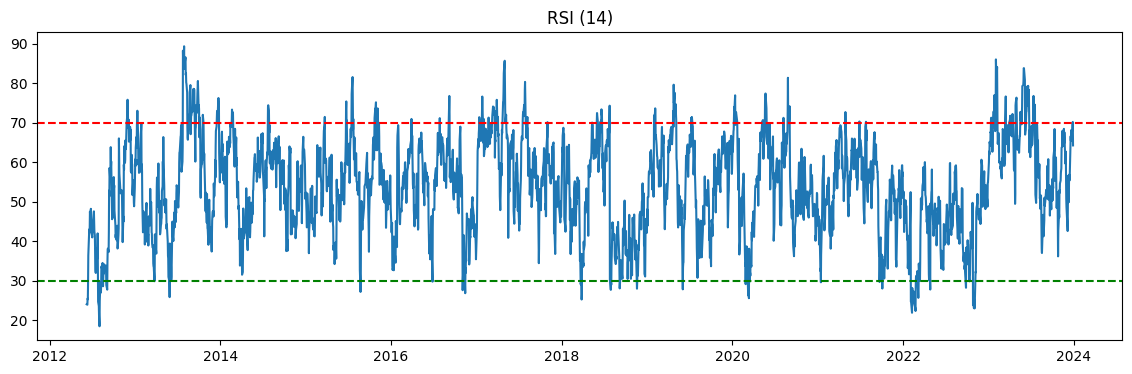

In [6]:
plt.figure(figsize=(14,4))
plt.plot(df["Date"], df["RSI_14"])
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("RSI (14)")
plt.show()


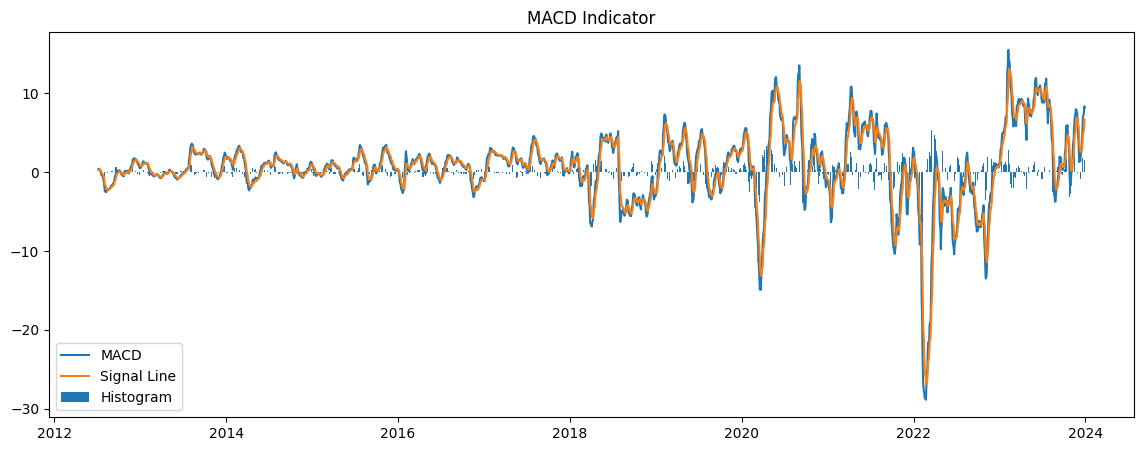

In [7]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["MACD"], label="MACD")
plt.plot(df["Date"], df["MACD_signal"], label="Signal Line")
plt.bar(df["Date"], df["MACD_hist"], label="Histogram")
plt.title("MACD Indicator")
plt.legend()
plt.show()


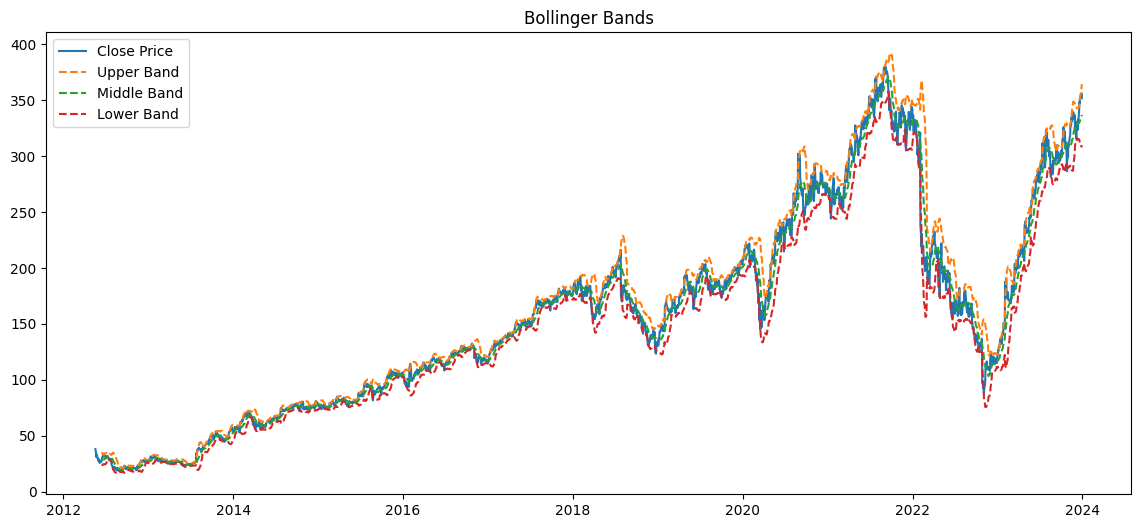

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["upper_band"], label="Upper Band", linestyle="--")
plt.plot(df["Date"], df["middle_band"], label="Middle Band", linestyle="--")
plt.plot(df["Date"], df["lower_band"], label="Lower Band", linestyle="--")
plt.title("Bollinger Bands")
plt.legend()
plt.show()


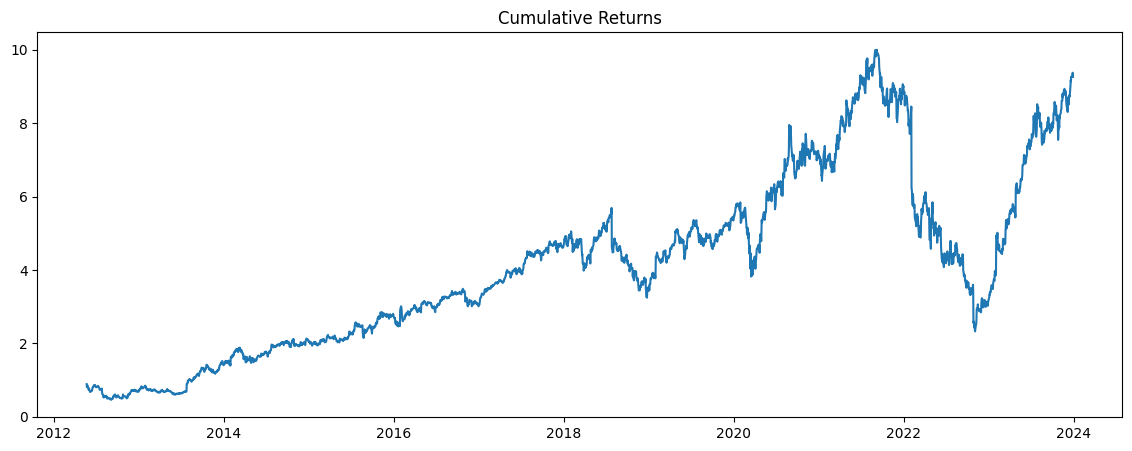

In [9]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Cumulative_Returns"])
plt.title("Cumulative Returns")
plt.show()


In [10]:
summary = df[[
    "Close", "SMA_20", "SMA_50", "RSI_14",
    "MACD", "MACD_signal", "Volatility_20", "Sharpe"
]].tail(10)

summary


,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_signal,Volatility_20,Sharpe
2913,332.867981,329.319841,320.452905,56.769317,2.650382,2.594225,0.015003,0.014368
2914,342.508514,329.795905,321.033127,63.383621,3.570449,2.789470,0.016323,0.094129
2915,348.213318,330.312218,321.669206,66.636636,4.705695,3.172715,0.016411,0.099538
2916,347.139984,330.923450,322.214644,65.458340,5.455884,3.629348,0.016269,0.117963
2917,351.920502,331.549590,322.736824,68.158903,6.362815,4.176042,0.016284,0.119047
2918,351.224823,332.302945,323.317843,67.333885,6.945367,4.729907,0.016090,0.144006
2919,352.655975,333.303278,324.115724,68.187000,7.436800,5.271285,0.015809,0.192459
2920,355.637543,334.239505,324.844828,69.947874,7.974921,5.812012,0.015697,0.179938
2921,356.124634,335.537503,325.527023,70.237702,8.344500,6.318510,0.014758,0.263881
2922,351.791290,336.869788,326.262290,64.296803,8.193282,6.693464,0.014566,0.277778
